In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from datetime import datetime, timedelta

In [8]:
data = pd.read_csv("sensex_nifty_.csv", parse_dates=['Date'])
data.set_index('Date', inplace=True)
data.dropna(inplace=True)
data.head()


<ipython-input-8-5cc9c35c41ab>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv("sensex_nifty_.csv", parse_dates=['Date'])


,Sensex,Nifty
Date,,
17-04-2025,"78,553.20","23,851.65"
16-04-2025,"77,044.29","23,437.20"
15-04-2025,"76,734.89","23,328.55"
11/4/2025,"75,157.26","22,828.55"
9/4/2025,"73,847.15","22,399.15"


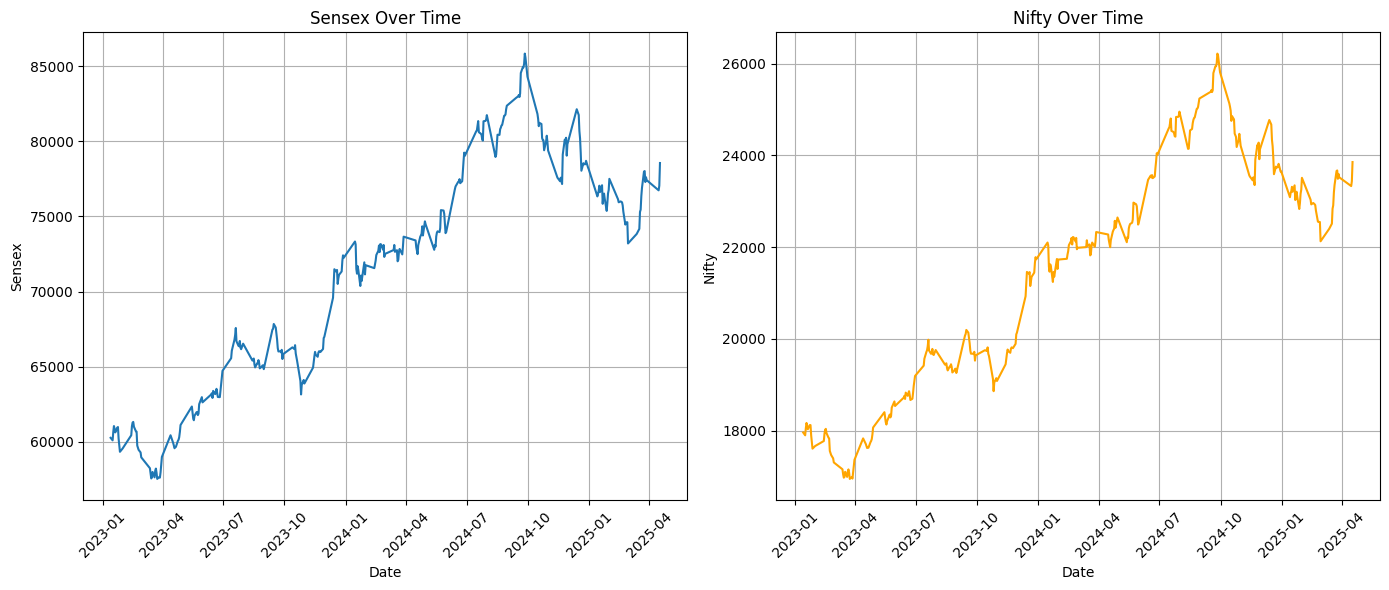

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load CSV
data = pd.read_csv("sensex_nifty_.csv")

# Step 2: Clean and convert Date column
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')

# Step 3: Drop rows where Date is invalid
data.dropna(subset=['Date'], inplace=True)

# Step 4: Clean numerical values (remove commas and convert to float)
data['Sensex'] = data['Sensex'].str.replace(',', '').astype(float)
data['Nifty'] = data['Nifty'].str.replace(',', '').astype(float)

# Step 5: Set Date as index and sort
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)

# Step 6: Plotting
plt.figure(figsize=(14, 6))

# Plot 1: Sensex
plt.subplot(1, 2, 1)
plt.plot(data.index, data['Sensex'], label='Sensex')
plt.title('Sensex Over Time')
plt.xlabel('Date')
plt.ylabel('Sensex')
plt.grid(True)
plt.xticks(rotation=45)

# Plot 2: Nifty
plt.subplot(1, 2, 2)
plt.plot(data.index, data['Nifty'], label='Nifty', color='orange')
plt.title('Nifty Over Time')
plt.xlabel('Date')
plt.ylabel('Nifty')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [12]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Step 1: Regress Sensex on Nifty to find optimal x
X = sm.add_constant(data['Nifty'])  # add intercept
model = sm.OLS(data['Sensex'], X).fit()
x = model.params['Nifty']
print(f"Optimal x = {x:.4f}")

# Step 2: Compute the spread
data['Spread'] = data['Sensex'] - x * data['Nifty']

# Step 3: Augmented Dickey-Fuller test on the spread
adf_result = adfuller(data['Spread'])

# Print results
print("\nADF Test for Mean Reversion of Spread:")
print(f"ADF Statistic : {adf_result[0]:.4f}")
print(f"p-value       : {adf_result[1]:.4f}")
print("Stationary" if adf_result[1] < 0.05 else "Non-Stationary")


Optimal x = 3.0016

ADF Test for Mean Reversion of Spread:
ADF Statistic : -3.5729
p-value       : 0.0063
Stationary
